# A Notebook for Smoothing and Segmenting Images

This notebook allows you to smooth and segment images.

The notebook uses the [numpy](http://numpy.org) library to manage data and the [matplotlib](https://matplotlib.org) library to visualize the results, and an image processing library called [scikit-image](http://scikit-image.org).

The following cell contains some predefined functions to implement [watershed segmentation](https://en.wikipedia.org/wiki/Watershed_(image_processing) and smoothing by [Gaussian filters](https://en.wikipedia.org/wiki/Gaussian_blur). Please make sure you have run this cell before you run other cells in this notebook.

## Preliminary Setup

The following cell contains some predefined functions to smooth image and segment it. When you run the cell, the definitions of these functions will be incorporated into the notebook.

In [1]:
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature,io,color
from skimage.morphology import watershed
from skimage.filters import threshold_otsu,threshold_yen,gaussian


def loadIMG():
    filename=input("Please input the image filename:")
    #filename = os.path.abspath('rocks.jpg')
    img = io.imread(filename)
    #if len(img)!=2:
    #    img = color.rgb2gray(img)
    return img

def Smooth(img):
    smoothedImg = gaussian(img,sigma=2.5,multichannel=True)
    return smoothedImg

def displaySmooth(img):
    plt.clf()
    smoothedImg=Smooth(img)
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(smoothedImg, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Smoothed Image', fontsize=10)
    fig.tight_layout()
    plt.show() 
    
def Segment(img):
    if len(img.shape)>2:
        img = color.rgb2gray(img)
    #markers = np.zeros_like(img)
    #markers[img < 0.5] = 1
    #markers[img > 0.6] = 2
    #segmentation = watershed(img, markers)
    
    #thresh = threshold_otsu(img)
    thresh = threshold_yen(img)
    segmentation = img > thresh
    return segmentation

def displaySegment(img):
    plt.clf()
    segmentation=Segment(img)
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(segmentation, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Segmented Image', fontsize=10)
    fig.tight_layout()
    plt.show() 

## Smooth an Image
Run the following cell and input the filename of an image that you want to process.

Please input the image filename:./Image processing/longjump.jpg


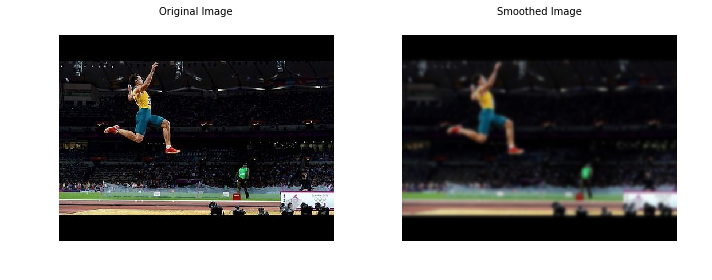

In [2]:
img=loadIMG()
displaySmooth(img)

## Segment an Image
Run the following cell and input the filename of an image that you want to process. 

YIBO: the below did not work as I wanted, I think you have to change the Segment function to print the two images.

Please input the image filename:./Image processing/longjump.jpg


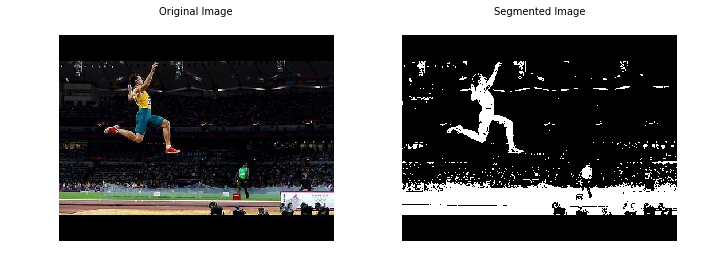

In [3]:
img=loadIMG()
displaySegment(img)

## Combining Smoothing and Segmenting

The cell below defines a function to smooth and then segment an image.  It will output the original image, the segmented image, and the image after smoothing and then segmenting it.

In [4]:
def plotSmoothThenSegment(img1):
    img2=Segment(img1)
    #img3=Segment(img3)
    img3=Smooth(img1)
    img3=Segment(img3)
    fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4),sharex=True, sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Segmented Image', fontsize=10)
    ax3.imshow(img3, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('Smoothed Then Segmented Image', fontsize=10)
    fig.tight_layout()
    plt.show() 

Running the following cell will execute that function with the image you choose. 

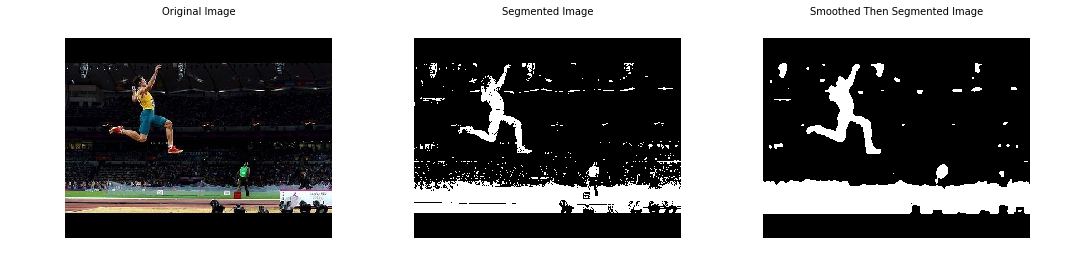

In [5]:
plotSmoothThenSegment(img)